Also see [steamreviews](https://pypi.org/project/steamreviews/)

In [1]:
%config Completer.use_jedi = False
import gzip
import spacy
import textacy
from spacymoji import Emoji


def parse(path):
    g = gzip.open(path, 'r')
    for l in g:
        yield eval(l)

nlp = spacy.load("en_core_web_sm")#, disable=["tagger", "parser", "ner", "textcat"])
emoji = Emoji(nlp)
nlp.add_pipe(emoji, first=True)

In [2]:
%%time
reviews = list(parse("./data/australian_user_reviews.json.gz"))
user_items = list(parse("./data/australian_users_items.json.gz"))

CPU times: user 1min 10s, sys: 1.84 s, total: 1min 12s
Wall time: 1min 12s


In [3]:
from spacy.attrs import ORTH, LEMMA, NORM, TAG
from spacy.lang.en.stop_words import STOP_WORDS
TOKENIZER_EXCEPTIONS = {
# do
    "don't": [
        {ORTH: "do", LEMMA: "do"},
        {ORTH: "n't", LEMMA: "not", NORM: "not", TAG: "RB"}],
    "doesn't": [
        {ORTH: "does", LEMMA: "do"},
        {ORTH: "n't", LEMMA: "not", NORM: "not", TAG: "RB"}],
    "didn't": [
        {ORTH: "did", LEMMA: "do"},
        {ORTH: "n't", LEMMA: "not", NORM: "not", TAG: "RB"}],
# can
    "can't": [
        {ORTH: "ca", LEMMA: "can"},
        {ORTH: "n't", LEMMA: "not", NORM: "not", TAG: "RB"}],
    "couldn't": [
        {ORTH: "could", LEMMA: "can"},
        {ORTH: "n't", LEMMA: "not", NORM: "not", TAG: "RB"}],
# have
    "I've'": [
        {ORTH: "I", LEMMA: "I"},
        {ORTH: "'ve'", LEMMA: "have", NORM: "have", TAG: "VERB"}],
    "haven't": [
        {ORTH: "have", LEMMA: "have"},
        {ORTH: "n't", LEMMA: "not", NORM: "not", TAG: "RB"}],
    "hasn't": [
        {ORTH: "has", LEMMA: "have"},
        {ORTH: "n't", LEMMA: "not", NORM: "not", TAG: "RB"}],
    "hadn't": [
        {ORTH: "had", LEMMA: "have"},
        {ORTH: "n't", LEMMA: "not", NORM: "not", TAG: "RB"}],
# will/shall will be replaced by will
    "I'll'": [
        {ORTH: "I", LEMMA: "I"},
        {ORTH: "'ll'", LEMMA: "will", NORM: "will", TAG: "VERB"}],
    "he'll'": [
        {ORTH: "he", LEMMA: "he"},
        {ORTH: "'ll'", LEMMA: "will", NORM: "will", TAG: "VERB"}],
    "she'll'": [
        {ORTH: "she", LEMMA: "she"},
        {ORTH: "'ll'", LEMMA: "will", NORM: "will", TAG: "VERB"}],
    "it'll'": [
        {ORTH: "it", LEMMA: "it"},
        {ORTH: "'ll'", LEMMA: "will", NORM: "will", TAG: "VERB"}],
    "won't": [
        {ORTH: "wo", LEMMA: "will"},
        {ORTH: "n't", LEMMA: "not", NORM: "not", TAG: "RB"}],
    "wouldn't": [
        {ORTH: "would", LEMMA: "will"},
        {ORTH: "n't", LEMMA: "not", NORM: "not", TAG: "RB"}],
# be
    "I'm'": [
        {ORTH: "I", LEMMA: "I"},
        {ORTH: "'m'", LEMMA: "be", NORM: "am", TAG: "VERB"}]
}

In [4]:
reviews[0]

{'user_id': '76561197970982479',
 'user_url': 'http://steamcommunity.com/profiles/76561197970982479',
 'reviews': [{'funny': '',
   'posted': 'Posted November 5, 2011.',
   'last_edited': '',
   'item_id': '1250',
   'helpful': 'No ratings yet',
   'recommend': True,
   'review': 'Simple yet with great replayability. In my opinion does "zombie" hordes and team work better than left 4 dead plus has a global leveling system. Alot of down to earth "zombie" splattering fun for the whole family. Amazed this sort of FPS is so rare.'},
  {'funny': '',
   'posted': 'Posted July 15, 2011.',
   'last_edited': '',
   'item_id': '22200',
   'helpful': 'No ratings yet',
   'recommend': True,
   'review': "It's unique and worth a playthrough."},
  {'funny': '',
   'posted': 'Posted April 21, 2011.',
   'last_edited': '',
   'item_id': '43110',
   'helpful': 'No ratings yet',
   'recommend': True,
   'review': 'Great atmosphere. The gunplay can be a bit chunky at times but at the end of the day this 

In [115]:
from tqdm import tqdm_notebook
reviews_meta = []
reviews_text = []

for i, u in enumerate(tqdm_notebook(reviews)):
    d = {'user_id': u['user_id']}
    for r in u['reviews']:
        for k, v in r.items():
            if k != 'review':
                d[k] = v
        reviews_text.append(r['review'])
        reviews_meta.append(d)

<ipython-input-115-25f38a4f0223>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i, u in enumerate(tqdm_notebook(reviews)):


  0%|          | 0/25799 [00:00<?, ?it/s]

In [116]:
reviews_meta[0], reviews_text[0]

({'user_id': '76561197970982479',
  'funny': '',
  'posted': 'Posted April 21, 2011.',
  'last_edited': '',
  'item_id': '43110',
  'helpful': 'No ratings yet',
  'recommend': True},
 'Simple yet with great replayability. In my opinion does "zombie" hordes and team work better than left 4 dead plus has a global leveling system. Alot of down to earth "zombie" splattering fun for the whole family. Amazed this sort of FPS is so rare.')

In [117]:
%%time
docs = list(nlp.pipe(reviews_text))
prepared_texts = [" ".join([t.lemma_ for t in d if not (t.is_stop or t._.is_emoji)]).lower() for d in tqdm_notebook(docs)]

<timed exec>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/59305 [00:00<?, ?it/s]

CPU times: user 5min, sys: 36.1 s, total: 5min 36s
Wall time: 5min 36s


In [118]:
docs = [textacy.make_spacy_doc(x, nlp) for x in tqdm_notebook(zip(prepared_texts, reviews_meta), total=len(reviews_meta))]

<ipython-input-118-520dfd6306cf>:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  docs = [textacy.make_spacy_doc(x, nlp) for x in tqdm_notebook(zip(prepared_texts, reviews_meta), total=len(reviews_meta))]


  0%|          | 0/59305 [00:00<?, ?it/s]

In [119]:
%%time
corpus = textacy.Corpus(nlp, data=docs)

CPU times: user 289 ms, sys: 444 µs, total: 289 ms
Wall time: 288 ms


In [10]:
corpus[1]

unique worth playthrough .

In [11]:
corpus[1][1].lemma_

'worth'

In [12]:
%%time
normalized = [
    doc._.to_terms_list(ngrams=[1], entities=True, as_strings=True, normalize='lemma')
    for doc in tqdm_notebook(corpus)
]

<timed exec>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/59305 [00:00<?, ?it/s]

CPU times: user 892 ms, sys: 44 ms, total: 936 ms
Wall time: 930 ms


In [13]:
import textacy.tm
import textacy.vsm
vectorizer = textacy.vsm.Vectorizer(
    tf_type="linear", 
    apply_idf=True, 
    idf_type="smooth", 
    norm="l2",
    min_df=5, 
    max_df=0.95
)

doc_term_matrix = vectorizer.fit_transform(normalized)
model = textacy.tm.TopicModel("nmf", n_topics=15)
model.fit(doc_term_matrix)

doc_topic_matrix = model.transform(doc_term_matrix)

/home/nizhikebinesi/fixed/classic-ml/venv_my/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


In [14]:
for topic_idx, top_terms in model.top_topic_terms(vectorizer.id_to_term, top_n=10):
    print("topic", topic_idx, ":", "   ".join(top_terms))

topic 0 : game   recommend   cool   epic   favourite   awsome   funny   steam   year   suck
topic 1 : good   pretty   fps   free   graphic   game   shooter   simulator   far   rpg
topic 2 : fun   friend   lot   addictive   hard   pretty   addict   heap   alot   super
topic 3 : awesome   graphic   e   fps   recommend   gameplay   friend   word   worth   u
topic 4 : great   friend   game   graphic   story   gameplay   community   fps   storyline   multiplayer
topic 5 : play   friend   free   stop   hour   steam   people   enjoy   online   day
topic 6 : 10/10   ign   bang   kill   life   simulator   rate   ruin   die   -ign
topic 7 : love   <3   bit   absolutely   far   e   story   game   mod   hate
topic 8 : amazing   graphic   simply   story   gameplay   e   absolutely   word   recommend   soundtrack
topic 9 : like   minecraft   feel   people   look   thing   gun   dayz   zombie   u
topic 10 : buy   worth   money   sale   $   dlc   regret   read   review   not
topic 11 : jogo   e   de  

In [15]:
doc = nlp('$')
doc[0].pos_

'SYM'

In [120]:
prepared_texts = [" ".join([t.text for t in d if (t.pos_ not in ['X', 'SYM'] and len(t.text) > 2)]).lower() for d in tqdm_notebook(docs)]

<ipython-input-120-2007bdcec715>:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  prepared_texts = [" ".join([t.text for t in d if (t.pos_ not in ['X', 'SYM'] and len(t.text) > 2)]).lower() for d in tqdm_notebook(docs)]


  0%|          | 0/59305 [00:00<?, ?it/s]

In [121]:
%%time
docs = [textacy.make_spacy_doc(x, nlp) for x in tqdm_notebook(zip(prepared_texts, reviews_meta), total=len(reviews_meta))]
corpus = textacy.Corpus(nlp, data=docs)

<timed exec>:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/59305 [00:00<?, ?it/s]

CPU times: user 7min 41s, sys: 1.85 s, total: 7min 43s
Wall time: 7min 42s


In [18]:
%%time
normalized = [
    doc._.to_terms_list(ngrams=[1], entities=True, as_strings=True, normalize='lemma')
    for doc in tqdm_notebook(corpus)
]

<timed exec>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/59305 [00:00<?, ?it/s]

CPU times: user 346 ms, sys: 51.8 ms, total: 398 ms
Wall time: 395 ms


In [19]:
import textacy.tm
import textacy.vsm
vectorizer = textacy.vsm.Vectorizer(
    tf_type="linear", 
    apply_idf=True, 
    idf_type="smooth", 
    norm="l2",
    min_df=5, 
    max_df=0.95
)

doc_term_matrix = vectorizer.fit_transform(normalized)
model = textacy.tm.TopicModel("nmf", n_topics=15)
model.fit(doc_term_matrix)

doc_topic_matrix = model.transform(doc_term_matrix)

/home/nizhikebinesi/fixed/classic-ml/venv_my/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


In [20]:
for topic_idx, top_terms in model.top_topic_terms(vectorizer.id_to_term, top_n=10):
    print("topic", topic_idx, ":", "   ".join(top_terms))

topic 0 : game   recommend   epic   favourite   awsome   year   funny   steam   suck   enjoy
topic 1 : good   pretty   fps   free   graphic   game   shooter   simulator   far   zombie
topic 2 : fun   friend   lot   addictive   hard   addict   pretty   heap   alot   super
topic 3 : awesome   graphic   fps   recommend   word   friend   gameplay   e   worth   look
topic 4 : great   friend   graphic   game   story   gameplay   multiplayer   community   storyline   fps
topic 5 : play   friend   free   stop   hour   steam   people   day   enjoy   online
topic 6 : 10/10   ign   bang   kill   life   simulator   rate   ruin   die   -ign
topic 7 : love   absolutely   story   mod   bit   life   far   game   tf2   hate
topic 8 : amazing   graphic   simply   story   gameplay   absolutely   word   worth   recommend   soundtrack
topic 9 : like   minecraft   feel   people   look   thing   gun   stuff   tf2   skyrim
topic 10 : buy   worth   money   sale   dlc   regret   read   review   want   ing
topic

In [21]:
# doc.lang_

In [122]:
%%time
prepared_texts = [" ".join([t.text for t in d if t.lemma_ != 'game']).lower() for d in tqdm_notebook(docs)]
docs = [textacy.make_spacy_doc(x, nlp) for x in tqdm_notebook(zip(prepared_texts, reviews_meta), total=len(reviews_meta))]
docs = [doc for doc in docs if doc.lang_ == 'en']
corpus = textacy.Corpus(nlp, data=docs)

<timed exec>:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/59305 [00:00<?, ?it/s]

<timed exec>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/59305 [00:00<?, ?it/s]

CPU times: user 7min 28s, sys: 1.98 s, total: 7min 30s
Wall time: 7min 28s


In [23]:
%%time
normalized = [
    doc._.to_terms_list(ngrams=[1], entities=True, as_strings=True, normalize='lemma')
    for doc in tqdm_notebook(corpus)
]

<timed exec>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/59305 [00:00<?, ?it/s]

CPU times: user 1.29 s, sys: 32.1 ms, total: 1.32 s
Wall time: 1.31 s


In [24]:
import textacy.tm
import textacy.vsm
vectorizer = textacy.vsm.Vectorizer(
    tf_type="linear", 
    apply_idf=True, 
    idf_type="smooth", 
    norm="l2",
    min_df=5, 
    max_df=0.95
)

doc_term_matrix = vectorizer.fit_transform(normalized)
model = textacy.tm.TopicModel("nmf", n_topics=15)
model.fit(doc_term_matrix)

doc_topic_matrix = model.transform(doc_term_matrix)

/home/nizhikebinesi/fixed/classic-ml/venv_my/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


In [25]:
for topic_idx, top_terms in model.top_topic_terms(vectorizer.id_to_term, top_n=10):
    print("topic", topic_idx, ":", "   ".join(top_terms))

topic 0 : good   pretty   fps   graphic   shooter   zombie   far   simulator   world   f2p
topic 1 : fun   friend   lot   addictive   addict   hard   pretty   alot   super   heap
topic 2 : great   friend   graphic   story   gameplay   recommend   community   multiplayer   addictive   storyline
topic 3 : awesome   graphic   recommend   fps   word   friend   e   gameplay   worth   try
topic 4 : play   friend   stop   hour   enjoy   steam   people   day   know   year
topic 5 : love   absolutely   mod   bit   awsome   story   life   far   hate   recomend
topic 6 : 10/10   ign   bang   kill   life   simulator   rate   die   ruin   -ign
topic 7 : like   minecraft   feel   people   look   thing   gun   stuff   tf2   zombie
topic 8 : amazing   graphic   simply   story   gameplay   absolutely   word   recommend   worth   soundtrack
topic 9 : buy   worth   money   sale   dlc   regret   read   review   want   steam
topic 10 : time   recommend   bad   want   people   hour   thing   think   story  

In [26]:
model.model.reconstruction_err_

217.79578550779647

In [32]:
%%time
normalized = [
    doc._.to_terms_list(ngrams=[1], entities=True, as_strings=True, normalize='lemma')
    for doc in tqdm_notebook(corpus)
]

<timed exec>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/59305 [00:00<?, ?it/s]

CPU times: user 319 ms, sys: 27.9 ms, total: 347 ms
Wall time: 344 ms


In [33]:
import textacy.tm
import textacy.vsm
vectorizer = textacy.vsm.Vectorizer(
    tf_type="linear", 
    apply_idf=True, 
    idf_type="smooth", 
    norm="l2",
    min_df=5, 
    max_df=0.95
)

doc_term_matrix = vectorizer.fit_transform(normalized)
model = textacy.tm.TopicModel("nmf", n_topics=20)
model.fit(doc_term_matrix)

doc_topic_matrix = model.transform(doc_term_matrix)

/home/nizhikebinesi/fixed/classic-ml/venv_my/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


In [34]:
for topic_idx, top_terms in model.top_topic_terms(vectorizer.id_to_term, top_n=10):
    print("topic", topic_idx, ":", "   ".join(top_terms))

topic 0 : good   fps   graphic   shooter   zombie   far   world   simulator   steam   f2p
topic 1 : fun   lot   addictive   addict   hard   super   alot   heap   load   enjoyable
topic 2 : great   graphic   story   gameplay   community   multiplayer   addictive   storyline   fps   lot
topic 3 : awesome   graphic   fps   word   gameplay   e   worth   try   look   epic
topic 4 : play   stop   hour   enjoy   steam   day   people   know   year   far
topic 5 : love   absolutely   mod   awsome   bit   hate   recomend   story   far   life
topic 6 : 10/10   ign   bang   kill   life   simulator   rate   die   ruin   -ign
topic 7 : like   minecraft   feel   people   look   thing   gun   stuff   tf2   zombie
topic 8 : amazing   graphic   simply   gameplay   story   absolutely   word   worth   soundtrack   music
topic 9 : buy   worth   money   sale   dlc   regret   read   review   want   steam
topic 10 : time   want   hour   think   thing   people   worth   story   need   new
topic 11 : nice   gra

In [35]:
model.model.reconstruction_err_

215.61472090472648

In [40]:
import nltk
from nltk.corpus import stopwords
STOP_WORDS = set(stopwords.words('english'))

In [123]:
%%time
prepared_texts = [" ".join([t.text for t in d if t.text not in STOP_WORDS and "/" not in t.text]).lower() for d in tqdm_notebook(docs)]
docs = [textacy.make_spacy_doc(x, nlp) for x in tqdm_notebook(zip(prepared_texts, reviews_meta), total=len(reviews_meta))]
docs = [doc for doc in docs if doc.lang_ == 'en']
corpus = textacy.Corpus(nlp, data=docs)

<timed exec>:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/59305 [00:00<?, ?it/s]

<timed exec>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/59305 [00:00<?, ?it/s]

CPU times: user 7min 31s, sys: 1.83 s, total: 7min 33s
Wall time: 7min 31s


In [46]:
%%time
normalized = [
    doc._.to_terms_list(ngrams=[1], entities=True, as_strings=True, normalize='lemma')
    for doc in tqdm_notebook(corpus)
]

<timed exec>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/59305 [00:00<?, ?it/s]

CPU times: user 1.46 s, sys: 43.8 ms, total: 1.5 s
Wall time: 1.5 s


In [47]:
import textacy.tm
import textacy.vsm
vectorizer = textacy.vsm.Vectorizer(
    tf_type="linear", 
    apply_idf=True, 
    idf_type="smooth", 
    norm="l2",
    min_df=5, 
    max_df=0.95
)

doc_term_matrix = vectorizer.fit_transform(normalized)
model = textacy.tm.TopicModel("nmf", n_topics=60)
model.fit(doc_term_matrix)

doc_topic_matrix = model.transform(doc_term_matrix)

/home/nizhikebinesi/fixed/classic-ml/venv_my/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


In [48]:
for topic_idx, top_terms in model.top_topic_terms(vectorizer.id_to_term, top_n=10):
    print("topic", topic_idx, ":", "   ".join(top_terms))

topic 0 : good   far   world   rpg   f2p   ing   damn   stuff   survival   probably
topic 1 : fun   addict   alot   super   heap   load   enjoyable   simple   little   online
topic 2 : great   community   storyline   strategy   reccomend   recomend   overall   survival   classic   job
topic 3 : awesome   word   e   super   storyline   bloody   holy   recomend   gore   totally
topic 4 : play   stop   enjoy   day   far   minute   long   online   probably   start
topic 5 : love   absolutely   hate   recomend   bit   far   tf2   ing   favourite   style
topic 6 : like   minecraft   feel   tf2   stuff   cod   alot   skyrim   dayz   space
topic 7 : amazing   simply   absolutely   word   reccomend   soundtrack   music   truly   storyline   overall
topic 8 : buy   sale   regret   read   review   ing   cheap   stop   wait   price
topic 9 : nice   music   little   style   meme   great nice   art   dota   visual   short
topic 10 : dis   liek   gam   dank   gewd   luv   gem   wtf   bro   cri
topic 

In [124]:
%%time
prepared_texts = [" ".join([t.text for t in d if t.pos_ not in ['NUM']]) for d in tqdm_notebook(docs)]
docs = [textacy.make_spacy_doc(x, nlp) for x in tqdm_notebook(zip(prepared_texts, reviews_meta), total=len(reviews_meta))]
docs = [doc for doc in docs if doc.lang_ == 'en']
corpus = textacy.Corpus(nlp, data=docs)
normalized = [
    doc._.to_terms_list(ngrams=[1], entities=True, as_strings=True, normalize='lemma')
    for doc in tqdm_notebook(corpus)
]

<timed exec>:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/59305 [00:00<?, ?it/s]

<timed exec>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/59305 [00:00<?, ?it/s]

<timed exec>:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/59305 [00:00<?, ?it/s]

CPU times: user 7min 12s, sys: 1.7 s, total: 7min 14s
Wall time: 7min 12s


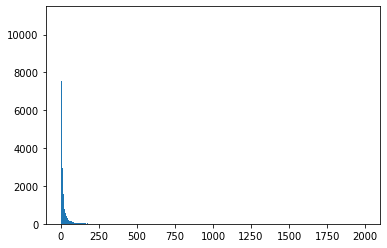

In [65]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

sizes = np.array([len(doc) for doc in docs])
plt.hist(sizes, bins=1000);

In [71]:
np.median(sizes), len(sizes[sizes < 2]), len(sizes), len(sizes) * 0.1

(6.0, 9041, 59305, 5930.5)

In [125]:
%%time
docs = [doc for doc in docs if len(doc) >= 2]
corpus = textacy.Corpus(nlp, data=docs)
normalized = [
    doc._.to_terms_list(ngrams=[1], entities=True, as_strings=True, normalize='lemma')
    for doc in tqdm_notebook(corpus)
]

<timed exec>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/50264 [00:00<?, ?it/s]

CPU times: user 483 ms, sys: 39.7 ms, total: 522 ms
Wall time: 522 ms


In [73]:
import textacy.tm
import textacy.vsm
vectorizer = textacy.vsm.Vectorizer(
    tf_type="linear", 
    apply_idf=True, 
    idf_type="smooth", 
    norm="l2",
    min_df=5, 
    max_df=0.95
)

doc_term_matrix = vectorizer.fit_transform(normalized)
model = textacy.tm.TopicModel("nmf", n_topics=60)
model.fit(doc_term_matrix)

doc_topic_matrix = model.transform(doc_term_matrix)

for topic_idx, top_terms in model.top_topic_terms(vectorizer.id_to_term, top_n=10):
    print("topic", topic_idx, ":", "   ".join(top_terms))

topic 0 : great   community   storyline   reccomend   strategy   recomend   overall   survival   classic   job
topic 1 : good   far   world   rpg   f2p   damn   yeah   probably   stuff   survival
topic 2 : fun   addict   alot   super   load   heap   enjoyable   simple   little   online
topic 3 : play   stop   day   minute   long   start   online   far   dota   probably
topic 4 : player   find   try   way   start   run   level   weapon   character   come
topic 5 : awesome   word   e   try   epic   super   storyline   bloody   holy   gore
topic 6 : love   absolutely   awsome   hate   bit   recomend   far   tf2   favourite   style
topic 7 : buy   sale   regret   read   review   cheap   wait   stop   epic   price
topic 8 : amazing   simply   absolutely   word   reccomend   soundtrack   music   truly   storyline   overall
topic 9 : jogo   esse   com   que   melhor   mais   não   uma   pra   recomendo
topic 10 : like   alot   stuff   tf2   cod   skyrim   space   kinda   duty   war
topic 11 :

In [75]:
# "yes" in STOP_WORDS

In [126]:
%%time
prepared_texts = [" ".join([t.lemma_ for t in d if len(t.lemma_) > 2]) for d in tqdm_notebook(docs)]
docs = [textacy.make_spacy_doc(x, nlp) for x in tqdm_notebook(prepared_texts)]
docs = [doc for doc in docs if len(doc) >= 2]
corpus = textacy.Corpus(nlp, data=docs)
normalized = [
    doc._.to_terms_list(ngrams=[1], entities=True, as_strings=True, normalize='lemma')
    for doc in tqdm_notebook(corpus)
]

<timed exec>:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/50264 [00:00<?, ?it/s]

<timed exec>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/50264 [00:00<?, ?it/s]

<timed exec>:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/50251 [00:00<?, ?it/s]

CPU times: user 6min 52s, sys: 1.67 s, total: 6min 53s
Wall time: 6min 52s


In [92]:
import textacy.tm
import textacy.vsm
vectorizer = textacy.vsm.Vectorizer(
    tf_type="linear", 
    apply_idf=True, 
    idf_type="smooth", 
    norm="l2",
    min_df=5, 
    max_df=0.95
)
normalized = [
    doc._.to_terms_list(ngrams=[1], entities=True, as_strings=True, normalize='lemma')
    for doc in tqdm_notebook(corpus)
]

doc_term_matrix = vectorizer.fit_transform(normalized)
model = textacy.tm.TopicModel("nmf", n_topics=60)
model.fit(doc_term_matrix)

doc_topic_matrix = model.transform(doc_term_matrix)

for topic_idx, top_terms in model.top_topic_terms(vectorizer.id_to_term, top_n=10):
    print("topic", topic_idx, ":", "   ".join(top_terms))

<ipython-input-92-b1addda514a7>:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for doc in tqdm_notebook(corpus)


  0%|          | 0/50251 [00:00<?, ?it/s]

topic 0 : great   community   storyline   reccomend   strategy   recomend   overall   survival   classic   job
topic 1 : good   far   world   rpg   f2p   damn   probably   stuff   survival   possibly
topic 2 : fun   addict   alot   super   load   heap   enjoyable   simple   online   challenging
topic 3 : play   stop   day   know   minute   start   long   online   far   dota
topic 4 : player   find   feel   way   start   know   run   level   character   weapon
topic 5 : awesome   word   epic   super   storyline   bloody   holy   gore   freakin   totally
topic 6 : love   absolutely   awsome   hate   recomend   far   tf2   favourite   style   fall
topic 7 : buy   sale   regret   read   review   ing   cheap   wait   stop   epic
topic 8 : amazing   simply   absolutely   word   reccomend   soundtrack   music   truly   storyline   overall
topic 9 : jogo   esse   com   que   melhor   mais   não   uma   pra   recomendo
topic 10 : like   feel   alot   stuff   cod   tf2   skyrim   space   kinda  

In [127]:
%%time
portugese = {
    'jogo',
    'esse',
    'que',
    'melhor',
    'mais',
    'não',
    'uma',
    'recomendo'
}

# prepared_texts = [" ".join([t.lemma_ for t in d if t.lemma_ not in portugese]) for d in tqdm_notebook(docs)]
# docs = [textacy.make_spacy_doc(x, nlp) for x in tqdm_notebook(prepared_texts)]
# docs = [doc for doc in docs if len(doc) >= 2]
# corpus = textacy.Corpus(nlp, data=docs)
# normalized = [
#     doc._.to_terms_list(ngrams=[1], entities=True, as_strings=True, normalize='lemma')
#     for doc in tqdm_notebook(corpus)
# ]

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 8.58 µs


In [96]:
import textacy.tm
import textacy.vsm
vectorizer = textacy.vsm.Vectorizer(
    tf_type="linear", 
    apply_idf=True, 
    idf_type="smooth", 
    norm="l2",
    min_df=5, 
    max_df=0.95
)
normalized = [
    doc._.to_terms_list(ngrams=[1], entities=True, as_strings=True, normalize='lemma')
    for doc in tqdm_notebook(corpus)
]

doc_term_matrix = vectorizer.fit_transform(normalized)
model = textacy.tm.TopicModel("nmf", n_topics=10)
model.fit(doc_term_matrix)

doc_topic_matrix = model.transform(doc_term_matrix)

for topic_idx, top_terms in model.top_topic_terms(vectorizer.id_to_term, top_n=10):
    print("topic", topic_idx, ":", "   ".join(top_terms))

<ipython-input-96-ceb5b9ac7c5a>:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for doc in tqdm_notebook(corpus)


  0%|          | 0/50124 [00:00<?, ?it/s]

topic 0 : great   friend   graphic   story   gameplay   recommend   multiplayer   community   fps   storyline
topic 1 : good   pretty   free   fps   graphic   shooter   zombie   simulator   far   world
topic 2 : fun   friend   lot   addictive   hard   addict   recommend   pretty   alot   super
topic 3 : play   friend   free   hour   stop   steam   enjoy   day   know   people
topic 4 : time   recommend   want   people   hour   thing   think   bad   need   kill
topic 5 : awesome   recommend   graphic   fps   word   gameplay   free   worth   try   epic
topic 6 : love   absolutely   mod   life   awsome   bit   hate   far   recomend   wait
topic 7 : buy   worth   money   sale   dlc   regret   read   want   review   steam
topic 8 : amazing   graphic   story   gameplay   simply   recommend   absolutely   word   worth   highly
topic 9 : like   minecraft   feel   people   look   gun   thing   zombie   dayz   tf2


In [97]:
import textacy.tm
import textacy.vsm
vectorizer = textacy.vsm.Vectorizer(
    tf_type="linear", 
    apply_idf=True, 
    idf_type="smooth", 
    norm="l2",
    min_df=5, 
    max_df=0.95
)
normalized = [
    doc._.to_terms_list(ngrams=[1, 2, 3], entities=True, as_strings=True, normalize='lemma')
    for doc in tqdm_notebook(corpus)
]

doc_term_matrix = vectorizer.fit_transform(normalized)
model = textacy.tm.TopicModel("nmf", n_topics=10)
model.fit(doc_term_matrix)

doc_topic_matrix = model.transform(doc_term_matrix)

for topic_idx, top_terms in model.top_topic_terms(vectorizer.id_to_term, top_n=10):
    print("topic", topic_idx, ":", "   ".join(top_terms))

<ipython-input-97-939ba9149485>:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for doc in tqdm_notebook(corpus)


  0%|          | 0/50124 [00:00<?, ?it/s]

topic 0 : time   amazing   want   recommend   people   thing   story   hour   think   find
topic 1 : good   good play   pretty good   pretty   good good   good fun   good free   good fps   fps   good like
topic 2 : fun   fun play   friend   good fun   great fun   fun friend   lot fun   lot   fun play friend   play friend
topic 3 : play   good play   friend   fun play   play friend   free play   free   great play   hour   play play
topic 4 : muito   bom   muito bom   com   para   mas   jogar   divertido   tem   bem
topic 5 : great   great fun   great play   great love   great great   friend   great story   great recommend   story   graphic
topic 6 : awesome   awesome fun   awesome play   awesome awesome   awesome love   awesome good   great awesome   awesome like   awesome recommend   awesome fps
topic 7 : love   great love   love play   awesome love   good love   play love   love love   love fun   amazing love   love good
topic 8 : buy   good buy   buy buy   worth   money   worth buy  

In [101]:
import textacy.tm
import textacy.vsm
vectorizer = textacy.vsm.Vectorizer(
    tf_type="linear", 
    apply_idf=True, 
    idf_type="smooth", 
    norm="l2",
    min_df=5, 
    max_df=0.95
)
normalized = [
    doc._.to_terms_list(ngrams=[1], entities=True, as_strings=True, normalize='lemma')
    for doc in tqdm_notebook(corpus)
]

doc_term_matrix = vectorizer.fit_transform(normalized)
model = textacy.tm.TopicModel("lda", n_topics=60)
model.fit(doc_term_matrix)

doc_topic_matrix = model.transform(doc_term_matrix)

for topic_idx, top_terms in model.top_topic_terms(vectorizer.id_to_term, top_n=10):
    print("topic", topic_idx, ":", "   ".join(top_terms))

<ipython-input-101-4e67a49fe525>:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for doc in tqdm_notebook(corpus)


  0%|          | 0/50124 [00:00<?, ?it/s]

topic 0 : gud   duty   -ign   date   boot   bet   trade   git   degree   skeleton
topic 1 : map   grind   cup   1st   clicker   ㅤㅤㅤㅤㅤㅤ   cookie   mixture   milk   cook
topic 2 : fps   think   dlc   valve   good   sea   winter   great   play   shrek
topic 3 : regret   endless   adventure   pack   crazy   freakin   ons   puzzler   ashamed   accent
topic 4 : dota   movie   yea   cure   tom   autism   queen   cloaker   chip   acheivement
topic 5 : dog   เล่น   crashea   hatch   mucho   frill   arcade   fighting   simulator   style
topic 6 : russian   learn   очень   quickscope   игру   все   friendzone   мне   много   она
topic 7 : wait   old   early   access   hey   dinosaur   bro   smash   couple hour   good
topic 8 : com   pra   muito   jogar   divertido   mas   tem   -pron-   pay   bom
topic 9 : classic   bug   soo   total   destruction   barrel   endlessly   racist   successor   slime
topic 10 : angry   cell   backflip   lick   headache   der   comment   mulitplayer   mobile   android

In [155]:
non_english = set('เล่นครับпростопростоможноигравсеигруоченьмногоонамнеสนุกมาก그리고게임을하지만게임은하지만' + "ヽーくゝ._,ノー-'_人`ーﾉム｀ヽ／ﾌﾌ|、＼")
portugese |= {'juego','muy','para','por','bueno','este','los','buen'}
additional_stop_words = {'-pron-'}
german = {'spaß', 'spiel', 'und'}

In [156]:
new_docs = []
for doc in tqdm_notebook(docs):
    ok = len(set(str(doc)) & non_english) == 0
    for t in doc:
        if t.text in portugese or t.text in german:
            ok = False
    if ok:
        new_docs.append(doc)
len(new_docs)

<ipython-input-156-d20780559bc1>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for doc in tqdm_notebook(docs):


  0%|          | 0/46894 [00:00<?, ?it/s]

38643

In [157]:
import gc
docs = new_docs
gc.collect()

93

In [158]:
prepared_texts = [" ".join([t.lemma_ for t in d if t.lemma_ not in additional_stop_words]) for d in tqdm_notebook(docs)]
docs = [textacy.make_spacy_doc(x, nlp) for x in tqdm_notebook(prepared_texts)]
docs = [doc for doc in docs if len(doc) >= 2]
corpus = textacy.Corpus(nlp, data=docs)
normalized = [
    doc._.to_terms_list(ngrams=[1], entities=True, as_strings=True, normalize='lemma')
    for doc in tqdm_notebook(corpus)
]

<ipython-input-158-71033fec5803>:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  prepared_texts = [" ".join([t.lemma_ for t in d if t.lemma_ not in additional_stop_words]) for d in tqdm_notebook(docs)]


  0%|          | 0/38643 [00:00<?, ?it/s]

<ipython-input-158-71033fec5803>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  docs = [textacy.make_spacy_doc(x, nlp) for x in tqdm_notebook(prepared_texts)]


  0%|          | 0/38643 [00:00<?, ?it/s]

<ipython-input-158-71033fec5803>:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for doc in tqdm_notebook(corpus)


  0%|          | 0/38643 [00:00<?, ?it/s]

In [159]:
import textacy.tm
import textacy.vsm
vectorizer = textacy.vsm.Vectorizer(
    tf_type="linear", 
    apply_idf=True, 
    idf_type="smooth", 
    norm="l2",
    min_df=5, 
    max_df=0.95
)
normalized = [
    doc._.to_terms_list(ngrams=[1], entities=True, as_strings=True, normalize='lemma')
    for doc in tqdm_notebook(corpus)
]

doc_term_matrix = vectorizer.fit_transform(normalized)
model = textacy.tm.TopicModel("lda", n_topics=60)
model.fit(doc_term_matrix)

doc_topic_matrix = model.transform(doc_term_matrix)

for topic_idx, top_terms in model.top_topic_terms(vectorizer.id_to_term, top_n=10):
    print("topic", topic_idx, ":", "   ".join(top_terms))

<ipython-input-159-4e67a49fe525>:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for doc in tqdm_notebook(corpus)


  0%|          | 0/38643 [00:00<?, ?it/s]

topic 0 : dota   bang   dragon   totally   steal   soul   movie   sell   blood   till
topic 1 : awesome   look   word   platformer   lose   fantastic   age   fun   good   bioshock
topic 2 : pretty   zombie   bad   good   people   enjoy   play   mmo   sim   fun
topic 3 : kid   yell   english   collection   script   oce   gladly   birthday   datum   nexus
topic 4 : life   half   unique   scroll   good   play   wat   complex   ops   wild
topic 5 : wich   innocent   native   postal   compra   wif   logo   necessity   essential   jesus
topic 6 : omfg   cup   hmm   magical   massacre   incoming   relaxing   curious   perfect   breakdown
topic 7 : like   minecraft   hate   cheap   good   experience   version   rage   medieval   school
topic 8 : play   old   good   start   yes   wow   like   fun   buy   great
topic 9 : brother   restart   mlg   hold   colour   legal   itz   guarantee   nah   sem
topic 10 : rly   meu   undertale   acess   minha   fica   genial   flatout   tony   jurassic
topic 

In [162]:
import textacy
from textacy.preprocessing import normalize_repeating_chars, normalize_whitespace


In [175]:
additional_stop_words |= set("ㅤㅤㅤㅤㅤㅤ" + "\t\n\r" + "    ")
prepared_texts = [" ".join([t.lemma_ for t in d]) for d in tqdm_notebook(docs)]
chars = "".join(set("".join(prepared_texts)))
prepared_texts = [normalize_repeating_chars(normalize_whitespace(text), chars=chars, maxn=2) for text in tqdm_notebook(prepared_texts)]
prepared_texts = [" ".join([t.lemma_ for t in d if (t.lemma_ not in additional_stop_words and t.lemma_ not in STOP_WORDS)]) for d in tqdm_notebook(docs)]

docs = [textacy.make_spacy_doc(x, nlp) for x in tqdm_notebook(prepared_texts)]
docs = [doc for doc in docs if len(doc) >= 2]
corpus = textacy.Corpus(nlp, data=docs)
normalized = [
    doc._.to_terms_list(ngrams=[1], entities=True, as_strings=True, normalize='lemma')
    for doc in tqdm_notebook(corpus)
]

<ipython-input-175-dcd46090d7f4>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  prepared_texts = [" ".join([t.lemma_ for t in d]) for d in tqdm_notebook(docs)]


  0%|          | 0/38643 [00:00<?, ?it/s]

<ipython-input-175-dcd46090d7f4>:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  prepared_texts = [normalize_repeating_chars(normalize_whitespace(text), chars=chars, maxn=2) for text in tqdm_notebook(prepared_texts)]


  0%|          | 0/38643 [00:00<?, ?it/s]

<ipython-input-175-dcd46090d7f4>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  prepared_texts = [" ".join([t.lemma_ for t in d if (t.lemma_ not in additional_stop_words and t.lemma_ not in STOP_WORDS)]) for d in tqdm_notebook(docs)]


  0%|          | 0/38643 [00:00<?, ?it/s]

<ipython-input-175-dcd46090d7f4>:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  docs = [textacy.make_spacy_doc(x, nlp) for x in tqdm_notebook(prepared_texts)]


  0%|          | 0/38643 [00:00<?, ?it/s]

<ipython-input-175-dcd46090d7f4>:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for doc in tqdm_notebook(corpus)


  0%|          | 0/38643 [00:00<?, ?it/s]

In [176]:
import textacy.tm
import textacy.vsm
vectorizer = textacy.vsm.Vectorizer(
    tf_type="linear", 
    apply_idf=True, 
    idf_type="smooth", 
    norm="l2",
    min_df=5, 
    max_df=0.95
)
normalized = [
    doc._.to_terms_list(ngrams=[1], entities=True, as_strings=True, normalize='lemma')
    for doc in tqdm_notebook(corpus)
]

doc_term_matrix = vectorizer.fit_transform(normalized)
model = textacy.tm.TopicModel("lda", n_topics=60)
model.fit(doc_term_matrix)

doc_topic_matrix = model.transform(doc_term_matrix)

for topic_idx, top_terms in model.top_topic_terms(vectorizer.id_to_term, top_n=10):
    print("topic", topic_idx, ":", "   ".join(top_terms))

<ipython-input-176-4e67a49fe525>:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for doc in tqdm_notebook(corpus)


  0%|          | 0/38643 [00:00<?, ?it/s]

topic 0 : gun   dota   gud   gr8   skyrim   happy   pew   angry   haha   like
topic 1 : addictive   wait   crash   super   dayz   mac   click   terrible   early   definately
topic 2 : awsome   recomend   year   good   sun   spell   salty   nearly   play   german
topic 3 : ing   holy   chapter   ending   luv   cash   emily   zombies   cup   f*ck
topic 4 : know   online   server   day   wow   ban   crap   kick   play   join
topic 5 : hacker   fan   ship   rts   beat   value   let   literally   replay   open
topic 6 : gewd   scott   oce   sh!t   acheivement   compra   tomorrow   logo   india   conquest
topic 7 : word   drill   modde   freedom   sega   sandvich   buffalo   allready   thermal   infamy
topic 8 : date   mlg   skeleton   itz   una   anal   spook   handsome   spaghetti   mucho
topic 9 : hour   spend   long   review   play   card   write   good   connection   com
topic 10 : addict   team   die   rpg   god   fortress   family   kinda   good   class
topic 11 : like   think   fast 

In [177]:
import textacy.tm
import textacy.vsm
vectorizer = textacy.vsm.Vectorizer(
    tf_type="linear", 
    apply_idf=True, 
    idf_type="smooth", 
    norm="l2",
    min_df=5, 
    max_df=0.95
)
normalized = [
    doc._.to_terms_list(ngrams=[1, 2, 3], entities=True, as_strings=True, normalize='lemma')
    for doc in tqdm_notebook(corpus)
]

doc_term_matrix = vectorizer.fit_transform(normalized)
model = textacy.tm.TopicModel("lda", n_topics=60)
model.fit(doc_term_matrix)

doc_topic_matrix = model.transform(doc_term_matrix)

for topic_idx, top_terms in model.top_topic_terms(vectorizer.id_to_term, top_n=10):
    print("topic", topic_idx, ":", "   ".join(top_terms))

<ipython-input-177-412a62090f87>:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for doc in tqdm_notebook(corpus)


  0%|          | 0/38643 [00:00<?, ?it/s]

topic 0 : awesome   work   mac   crash   wtf   plz   fix   immersive   mother   rock
topic 1 : meu   good amazing   fica   capitalist   butterfly   love complete   mastery   bore hour   underestimate   control play
topic 2 : best   legend   league   gore   league legend   music   metal   best fps   omfg   jack
topic 3 : great   gr8   great love   gun   world   bloody   skyrim   war   love   beat
topic 4 : pretty   good   pretty good   addictive   story   recommend   great   highly   explore   rate
topic 5 : f2p   girl   good f2p   trash   button   australian   coop   bem   window   australian server
topic 6 : waste   money   waste money   russian   steam   time   waste time   good steam   good   way
topic 7 : simulator   addict   wow   god   pls   thank   fun addict   fun little   games   fun
topic 8 : gud   git   git gud   dis gud   flashbang   gunz   enjoy second   bolt   fun real   alot stuff
topic 9 : alright   try   early access   access   early   quit   look   dog   food   bro
to

In [182]:
spanish = {'divertido'}
portugese |= {'muito'}
prepared_texts = [" ".join([normalize_repeating_chars(t.lemma_, chars=chars, maxn=2) for t in d if t.pos_ != "SPACE"]) for d in tqdm_notebook(docs)]
chars = "".join(set("".join(prepared_texts)))
prepared_texts = [normalize_repeating_chars(normalize_whitespace(text), chars=chars, maxn=2) for text in tqdm_notebook(prepared_texts)]

docs = [textacy.make_spacy_doc(x, nlp) for x in tqdm_notebook(prepared_texts)]
docs = [doc for doc in docs if len(doc) >= 2]
# corpus = textacy.Corpus(nlp, data=docs)
# normalized = [
#     doc._.to_terms_list(ngrams=[1], entities=True, as_strings=True, normalize='lemma')
#     for doc in tqdm_notebook(corpus)
# ]

<ipython-input-182-4e5212cfa6d0>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  prepared_texts = [" ".join([normalize_repeating_chars(t.lemma_, chars=chars, maxn=2) for t in d if t.pos_ != "SPACE"]) for d in tqdm_notebook(docs)]


  0%|          | 0/38643 [00:00<?, ?it/s]

<ipython-input-182-4e5212cfa6d0>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  prepared_texts = [normalize_repeating_chars(normalize_whitespace(text), chars=chars, maxn=2) for text in tqdm_notebook(prepared_texts)]


  0%|          | 0/38643 [00:00<?, ?it/s]

<ipython-input-182-4e5212cfa6d0>:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  docs = [textacy.make_spacy_doc(x, nlp) for x in tqdm_notebook(prepared_texts)]


  0%|          | 0/38643 [00:00<?, ?it/s]

In [183]:
new_docs = []
for doc in tqdm_notebook(docs):
    ok = len(set(str(doc)) & non_english) == 0
    for t in doc:
        if t.text in portugese or t.text in german or t.text in spanish:
            ok = False
    if ok:
        new_docs.append(doc)
len(new_docs)

<ipython-input-183-9dabadff8213>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for doc in tqdm_notebook(docs):


  0%|          | 0/38633 [00:00<?, ?it/s]

38436

In [184]:
import gc
docs = new_docs
gc.collect()
corpus = textacy.Corpus(nlp, data=docs)
normalized = [
    doc._.to_terms_list(ngrams=[1], entities=True, as_strings=True, normalize='lemma')
    for doc in tqdm_notebook(corpus)
]

<ipython-input-184-4f027cb746fa>:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for doc in tqdm_notebook(corpus)


  0%|          | 0/38436 [00:00<?, ?it/s]

In [185]:
import textacy.tm
import textacy.vsm
vectorizer = textacy.vsm.Vectorizer(
    tf_type="linear", 
    apply_idf=True, 
    idf_type="smooth", 
    norm="l2",
    min_df=5, 
    max_df=0.95
)
normalized = [
    doc._.to_terms_list(ngrams=[1, 2, 3], entities=True, as_strings=True, normalize='lemma')
    for doc in tqdm_notebook(corpus)
]

doc_term_matrix = vectorizer.fit_transform(normalized)
model = textacy.tm.TopicModel("lda", n_topics=60)
model.fit(doc_term_matrix)

doc_topic_matrix = model.transform(doc_term_matrix)

for topic_idx, top_terms in model.top_topic_terms(vectorizer.id_to_term, top_n=10):
    print("topic", topic_idx, ":", "   ".join(top_terms))

<ipython-input-185-412a62090f87>:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for doc in tqdm_notebook(corpus)


  0%|          | 0/38436 [00:00<?, ?it/s]

topic 0 : life   half   half life   good need   social   miss   need   rpg play   mod   mod play
topic 1 : simulator   addict   wow   need   god   fun addict   dog   face   good   fun
topic 2 : lol   guess   okay   trailer   deadly   alright guess   tom   fun alot   trench   hour know
topic 3 : portal   puzzle   load   enjoy   feel   simple   load fun   chill   retro   halo
topic 4 : great   pretty   friend   fun   fun play   play friend   play   pretty good   great fun   good
topic 5 : star   classic   music   difficult   quirky   banana   replayable   good star   racist   endlessly
topic 6 : pls   bore   little   fun little   tbh   expensive   fam   pls fix   little play   play bore
topic 7 : boring   wait   omg   brilliant   quit   real   review   play   care   love
topic 8 : gud   git   lady   git gud   dis gud   veri   play singleplayer   skrub   veri gud   shet
topic 9 : buy   worth   story   episode   borderland   scary   sale   price   worth buy   season
topic 10 : shoot   noob

In [188]:
additional_stop_words |= {'good', 'nice', 'fun', 'like', 'itz', 'bad'}
# prepared_texts = [" ".join([t.lemma_ for t in d]) for d in tqdm_notebook(docs)]
chars = "".join(set("".join(prepared_texts)))
prepared_texts = [" ".join([t.lemma_ for t in d if (t.lemma_ not in additional_stop_words and t.lemma_ not in STOP_WORDS and t.pos_ != 'SPACE')]) for d in tqdm_notebook(docs)]
prepared_texts = [normalize_repeating_chars(normalize_whitespace(text), chars=chars, maxn=2) for text in tqdm_notebook(prepared_texts)]

docs = [textacy.make_spacy_doc(x, nlp) for x in tqdm_notebook(prepared_texts)]
docs = [doc for doc in docs if len(doc) >= 2]
corpus = textacy.Corpus(nlp, data=docs)
normalized = [
    doc._.to_terms_list(ngrams=[1], entities=True, as_strings=True, normalize='lemma')
    for doc in tqdm_notebook(corpus)
]

<ipython-input-188-0c48c5999e06>:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  prepared_texts = [" ".join([t.lemma_ for t in d if (t.lemma_ not in additional_stop_words and t.lemma_ not in STOP_WORDS and t.pos_ != 'SPACE')]) for d in tqdm_notebook(docs)]


  0%|          | 0/36994 [00:00<?, ?it/s]

<ipython-input-188-0c48c5999e06>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  prepared_texts = [normalize_repeating_chars(normalize_whitespace(text), chars=chars, maxn=2) for text in tqdm_notebook(prepared_texts)]


  0%|          | 0/36994 [00:00<?, ?it/s]

<ipython-input-188-0c48c5999e06>:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  docs = [textacy.make_spacy_doc(x, nlp) for x in tqdm_notebook(prepared_texts)]


  0%|          | 0/36994 [00:00<?, ?it/s]

<ipython-input-188-0c48c5999e06>:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for doc in tqdm_notebook(corpus)


  0%|          | 0/36826 [00:00<?, ?it/s]

In [189]:
import textacy.tm
import textacy.vsm
vectorizer = textacy.vsm.Vectorizer(
    tf_type="linear", 
    apply_idf=True, 
    idf_type="smooth", 
    norm="l2",
    min_df=5, 
    max_df=0.95
)
normalized = [
    doc._.to_terms_list(ngrams=[1, 2, 3], entities=True, as_strings=True, normalize='lemma')
    for doc in tqdm_notebook(corpus)
]

doc_term_matrix = vectorizer.fit_transform(normalized)
model = textacy.tm.TopicModel("lda", n_topics=60)
model.fit(doc_term_matrix)

doc_topic_matrix = model.transform(doc_term_matrix)

for topic_idx, top_terms in model.top_topic_terms(vectorizer.id_to_term, top_n=10):
    print("topic", topic_idx, ":", "   ".join(top_terms))

<ipython-input-189-412a62090f87>:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for doc in tqdm_notebook(corpus)


  0%|          | 0/36826 [00:00<?, ?it/s]

topic 0 : super   yea   mlg   mutant   omfg   ftw   meu   dope   super power   dum
topic 1 : portal   rip   beat   level   refund   kill   achievement   bad   alien   ask
topic 2 : gay   aids   brah   playing friend   experience gamer   terrific   evry   plastic   great need   need decent
topic 3 : hat hat   shrek   hat hat hat   awesome hat   money want   finish time   kill lot   cartoon   pursuit   key bind
topic 4 : classic   multiplayer mode   replayable   anal   endlessly   racist   kidney   lucas   catchy   old buy
topic 5 : bloody   terrific   tom   love life   minha   people try   interesting think   alpha great   bambi   todos
topic 6 : lol   word   russian   war   bomb   noob   help   total   baby   total war
topic 7 : chinese   great new   rival   mods   mucho   mercenary   sheep   tony   abbott   find time
topic 8 : ball   child   punch   shark   guard   slide   awesomeness   handsome   left   old play
topic 9 : eat   freak   wonderful   confirm   aussie   come play   rad  

In [190]:
portugese |= {'simplesmente', 'viciante'}
additional_stop_words |= {'good', 'nice', 'fun', 'like', 'itz', 'bad', 'love'}
# prepared_texts = [" ".join([t.lemma_ for t in d]) for d in tqdm_notebook(docs)]
chars = "".join(set("".join(prepared_texts)))
prepared_texts = [" ".join([t.lemma_ for t in d if (t.lemma_ not in additional_stop_words and t.lemma_ not in STOP_WORDS and t.pos_ != 'SPACE')]) for d in tqdm_notebook(docs)]
prepared_texts = [normalize_repeating_chars(normalize_whitespace(text), chars=chars, maxn=2) for text in tqdm_notebook(prepared_texts)]

docs = [textacy.make_spacy_doc(x, nlp) for x in tqdm_notebook(prepared_texts)]
docs = [doc for doc in docs if len(doc) >= 2]
corpus = textacy.Corpus(nlp, data=docs)
normalized = [
    doc._.to_terms_list(ngrams=[1], entities=True, as_strings=True, normalize='lemma')
    for doc in tqdm_notebook(corpus)
]

<ipython-input-190-694acaf087f4>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  prepared_texts = [" ".join([t.lemma_ for t in d if (t.lemma_ not in additional_stop_words and t.lemma_ not in STOP_WORDS and t.pos_ != 'SPACE')]) for d in tqdm_notebook(docs)]


  0%|          | 0/36826 [00:00<?, ?it/s]

<ipython-input-190-694acaf087f4>:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  prepared_texts = [normalize_repeating_chars(normalize_whitespace(text), chars=chars, maxn=2) for text in tqdm_notebook(prepared_texts)]


  0%|          | 0/36826 [00:00<?, ?it/s]

<ipython-input-190-694acaf087f4>:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  docs = [textacy.make_spacy_doc(x, nlp) for x in tqdm_notebook(prepared_texts)]


  0%|          | 0/36826 [00:00<?, ?it/s]

<ipython-input-190-694acaf087f4>:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for doc in tqdm_notebook(corpus)


  0%|          | 0/36541 [00:00<?, ?it/s]

In [191]:
new_docs = []
for doc in tqdm_notebook(docs):
    ok = len(set(str(doc)) & non_english) == 0
    for t in doc:
        if t.text in portugese or t.text in german or t.text in spanish:
            ok = False
    if ok:
        new_docs.append(doc)
len(new_docs)

<ipython-input-191-9dabadff8213>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for doc in tqdm_notebook(docs):


  0%|          | 0/36541 [00:00<?, ?it/s]

36528

In [192]:
import gc
docs = new_docs
gc.collect()
corpus = textacy.Corpus(nlp, data=docs)
normalized = [
    doc._.to_terms_list(ngrams=[1], entities=True, as_strings=True, normalize='lemma')
    for doc in tqdm_notebook(corpus)
]

<ipython-input-192-4f027cb746fa>:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for doc in tqdm_notebook(corpus)


  0%|          | 0/36528 [00:00<?, ?it/s]

In [193]:
import textacy.tm
import textacy.vsm
vectorizer = textacy.vsm.Vectorizer(
    tf_type="linear", 
    apply_idf=True, 
    idf_type="smooth", 
    norm="l2",
    min_df=5, 
    max_df=0.95
)
normalized = [
    doc._.to_terms_list(ngrams=[1, 2, 3], entities=True, as_strings=True, normalize='lemma')
    for doc in tqdm_notebook(corpus)
]

doc_term_matrix = vectorizer.fit_transform(normalized)
model = textacy.tm.TopicModel("lda", n_topics=60)
model.fit(doc_term_matrix)

doc_topic_matrix = model.transform(doc_term_matrix)

for topic_idx, top_terms in model.top_topic_terms(vectorizer.id_to_term, top_n=10):
    print("topic", topic_idx, ":", "   ".join(top_terms))

<ipython-input-193-412a62090f87>:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for doc in tqdm_notebook(corpus)


  0%|          | 0/36528 [00:00<?, ?it/s]

topic 0 : addictive   ruin life   sell   soul   cure   highly addictive   warn   pretty awesome   meth   freddy
topic 1 : fps   dota   valve   forever   pass   fps play   great fps   master   haha   expect
topic 2 : stop   rip   stop play   break   source   alien   spooky   sword   play   dem
topic 3 : hat   eat   hat simulator   cute   simulator   key   confirm   pretty play   hat hat   yeh
topic 4 : chicken   esta   tie   accidentally   handsome   pero   kill   kill chicken   neck   rope
topic 5 : play   great   time   buy   amazing   want   story   people   thing   recommend
topic 6 : run   super   computer   day   head   review   sex   set   write   chapter
topic 7 : freak   nostalgia   hear   witch   waifu   loud   engage   layout   noise   report
topic 8 : simple   overkill   understand   charm   visual novel   novel   lady   insanely   cube   pick play
topic 9 : scary   horror   definately   play little   definately recommend   exellent   adictive   paint   lil   wonder
topic 10

In [194]:
import textacy.tm
import textacy.vsm
vectorizer = textacy.vsm.Vectorizer(
    tf_type="linear", 
    apply_idf=True, 
    idf_type="smooth", 
    norm="l2",
    min_df=5, 
    max_df=0.95
)
normalized = [
    doc._.to_terms_list(ngrams=[1], entities=True, as_strings=True, normalize='lemma')
    for doc in tqdm_notebook(corpus)
]

doc_term_matrix = vectorizer.fit_transform(normalized)
model = textacy.tm.TopicModel("lda", n_topics=60)
model.fit(doc_term_matrix)

doc_topic_matrix = model.transform(doc_term_matrix)

for topic_idx, top_terms in model.top_topic_terms(vectorizer.id_to_term, top_n=10):
    print("topic", topic_idx, ":", "   ".join(top_terms))

<ipython-input-194-4e67a49fe525>:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for doc in tqdm_notebook(corpus)


  0%|          | 0/36528 [00:00<?, ?it/s]

topic 0 : addictive   definately   fantasy   ace   compelling   great   troop   lara   stupidly   ftw
topic 1 : lot   recommend   highly   space   great   fix   bug   csgo   break   add
topic 2 : sem   undertale   fap   mejor   del   confusion   rhythm   mucho   compra   speaker
topic 3 : piece   destroy   imo   properly   development   bright   practice   gory   writing   flawless
topic 4 : end   fantastic   great   absolutely   skin   play   half   actually   blow   house
topic 5 : totally   fly   hilarious   giant   different   blood   gore   change   exciting   heist
topic 6 : una   nuf   handsome   sega   mods   flippin   interactivity   borderlands   bargin   pull
topic 7 : absolute   gaming   sooooo   loud   soooooo   noise   worthy   dope   blah   majestic
topic 8 : short   little   simple   goat   visual   read   control   understand   world   weird
topic 9 : mech   credit   lame   adictive   cartoony   invest   nerd   greate   thin   beard
topic 10 : kill   bit   chicken   or

In [198]:
strang_whitespaces = set('   ㅤㅤㅤ   ㅤㅤㅤ ㅤㅤㅤㅤㅤㅤ ㅤㅤㅤㅤㅤㅤ ㅤㅤㅤㅤㅤㅤ   ')
prepared_texts = [" ".join([t.lemma_ for t in d if len(set(t.lemma_) & strang_whitespaces) == 0]) for d in tqdm_notebook(docs)]
prepared_texts = [normalize_repeating_chars(normalize_whitespace(text), chars=chars, maxn=2) for text in tqdm_notebook(prepared_texts)]

docs = [textacy.make_spacy_doc(x, nlp) for x in tqdm_notebook(prepared_texts)]
docs = [doc for doc in docs if len(doc) >= 2]
corpus = textacy.Corpus(nlp, data=docs)
normalized = [
    doc._.to_terms_list(ngrams=[1], entities=True, as_strings=True, normalize='lemma')
    for doc in tqdm_notebook(corpus)
]

<ipython-input-198-94932c21aadb>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  prepared_texts = [" ".join([t.lemma_ for t in d if len(set(t.lemma_) & strang_whitespaces) == 0]) for d in tqdm_notebook(docs)]


  0%|          | 0/36528 [00:00<?, ?it/s]

<ipython-input-198-94932c21aadb>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  prepared_texts = [normalize_repeating_chars(normalize_whitespace(text), chars=chars, maxn=2) for text in tqdm_notebook(prepared_texts)]


  0%|          | 0/36528 [00:00<?, ?it/s]

<ipython-input-198-94932c21aadb>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  docs = [textacy.make_spacy_doc(x, nlp) for x in tqdm_notebook(prepared_texts)]


  0%|          | 0/36528 [00:00<?, ?it/s]

<ipython-input-198-94932c21aadb>:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for doc in tqdm_notebook(corpus)


  0%|          | 0/36515 [00:00<?, ?it/s]

In [199]:
import textacy.tm
import textacy.vsm
vectorizer = textacy.vsm.Vectorizer(
    tf_type="linear", 
    apply_idf=True, 
    idf_type="smooth", 
    norm="l2",
    min_df=5, 
    max_df=0.95
)
normalized = [
    doc._.to_terms_list(ngrams=[1], entities=True, as_strings=True, normalize='lemma')
    for doc in tqdm_notebook(corpus)
]

doc_term_matrix = vectorizer.fit_transform(normalized)
model = textacy.tm.TopicModel("lda", n_topics=60)
model.fit(doc_term_matrix)

doc_topic_matrix = model.transform(doc_term_matrix)

for topic_idx, top_terms in model.top_topic_terms(vectorizer.id_to_term, top_n=10):
    print("topic", topic_idx, ":", "   ".join(top_terms))

<ipython-input-199-4e67a49fe525>:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for doc in tqdm_notebook(corpus)


  0%|          | 0/36515 [00:00<?, ?it/s]

topic 0 : omg   sandbox   let   hero   hope   cut   pro   hype   fail   feeling
topic 1 : use   real   goat   tell   problem   eye   life   encounter   snipe   guide
topic 2 : party   step   cake   sonic   mario   repeat   mixture   cook   dumb   ice
topic 3 : civilization   special   quickly   hrs   record   wich   nonetheless   oppose   postal   downvote
topic 4 : alot   far   cod   button   girl   fall   press   play   hot   instead
topic 5 : hell   rate   bring   memory   sim   borderland   thumb   addon   coop   movie
topic 6 : pass   witch   sooooo   whiskey   population   skype   princess   frag   majestic   frantic
topic 7 : gun   skyrim   gr8   pew   close   fav   recomende   teh   cup   jet
topic 8 : need   simulator   addict   god   edition   profit   christ   infinite   dinos   premium
topic 9 : history   quit   style   arcade   low   fighting   ww2   country   dog   today
topic 10 : drill   lady   chinese   handsome   rival   acheivement   flashbang   conquest   flatout   

In [212]:
additional_stop_words |= {'yes', 'yea', 'yeah'}
chars = "".join(set("".join(prepared_texts)))
prepared_texts = [" ".join([t.lemma_ for t in d if (t.lemma_ not in additional_stop_words and t.lemma_ not in STOP_WORDS and t.pos_ != 'SPACE')]) for d in tqdm_notebook(docs)]
prepared_texts = [normalize_repeating_chars(normalize_whitespace(text), chars=chars, maxn=2) for text in tqdm_notebook(prepared_texts)]

docs = [textacy.make_spacy_doc(x, nlp) for x in tqdm_notebook(prepared_texts)]
docs = [doc for doc in docs if len(doc) >= 2]
corpus = textacy.Corpus(nlp, data=docs)
normalized = [
    doc._.to_terms_list(ngrams=[1], entities=True, as_strings=True, normalize='lemma')
    for doc in tqdm_notebook(corpus)
]

<ipython-input-212-d4fd729a8db5>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  prepared_texts = [" ".join([t.lemma_ for t in d if (t.lemma_ not in additional_stop_words and t.lemma_ not in STOP_WORDS and t.pos_ != 'SPACE')]) for d in tqdm_notebook(docs)]


  0%|          | 0/36515 [00:00<?, ?it/s]

<ipython-input-212-d4fd729a8db5>:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  prepared_texts = [normalize_repeating_chars(normalize_whitespace(text), chars=chars, maxn=2) for text in tqdm_notebook(prepared_texts)]


  0%|          | 0/36515 [00:00<?, ?it/s]

<ipython-input-212-d4fd729a8db5>:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  docs = [textacy.make_spacy_doc(x, nlp) for x in tqdm_notebook(prepared_texts)]


  0%|          | 0/36515 [00:00<?, ?it/s]

<ipython-input-212-d4fd729a8db5>:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for doc in tqdm_notebook(corpus)


  0%|          | 0/36411 [00:00<?, ?it/s]

In [217]:
import textacy.tm
import textacy.vsm
vectorizer = textacy.vsm.Vectorizer(
    tf_type="linear", 
    apply_idf=True, 
    idf_type="smooth", 
    norm="l2",
    min_df=5, 
    max_df=0.95
)
normalized = [
    doc._.to_terms_list(ngrams=[2, 3], entities=True, as_strings=True, normalize='lemma')
    for doc in tqdm_notebook(corpus)
]

doc_term_matrix = vectorizer.fit_transform(normalized)
model = textacy.tm.TopicModel("lda", n_topics=60)
model.fit(doc_term_matrix)

doc_topic_matrix = model.transform(doc_term_matrix)

for topic_idx, top_terms in model.top_topic_terms(vectorizer.id_to_term, top_n=10):
    print("topic", topic_idx, ":", "   ".join(top_terms))

<ipython-input-217-4cf07f02b6d9>:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for doc in tqdm_notebook(corpus)


  0%|          | 0/36411 [00:00<?, ?it/s]

topic 0 : start play   easy use   think great   play beta   great idea   hour later   multiplayer shooter   play end   weapon choose   dis
topic 1 : mac   total war   recommend buy   buy sale   play recommend   play people   able play   graphic amazing   want buy   stop work
topic 2 : stop play   year old   single player   new player   day play   buy regret   vac ban   shoot guy   pretty damn   wtf
topic 3 : definitely recommend   amazing graphic   hour gameplay   people think   amazing amazing   high quality   great mod   story drive   gameplay story   role play
topic 4 : hack slash   play minute   awsome   great amazing   think play   kill chicken   work computer   time run   shoot face   spend life
topic 5 : counter strike   people play   waste time   spend money   leave dead   learn curve   great way   lot time   team work   global offensive
topic 6 : hour   mod   time play   awesome play   worth play   spend hour   dark soul   worth cent   spend time   free roam
topic 7 : open wor

In [218]:
corpus.save("textacy_corpus.txtcy")

In [221]:
corpus = textacy.Corpus.load(lang=nlp, filepath="textacy_corpus.txtcy")

In [222]:
corpus[0]

simple great replayability opinion zombie horde team work well leave dead plus global leveling system alot earth zombie splatter family amazed sort fps rare

In [227]:
# ! pip install gensim

In [226]:
import gensim
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(corpus))

In [235]:
# del normalized, prepared_texts, docs
# del model, doc_term_matrix, doc_topic_matrix
# import gc
# gc.collect()